In [1]:
import matplotlib.pyplot as plt
import random as rnd

In [2]:
baraja48 = [1,2,3,4,5,6,7,8,9,10,11,12,
            1,2,3,4,5,6,7,8,9,10,11,12,
            1,2,3,4,5,6,7,8,9,10,11,12,
            1,2,3,4,5,6,7,8,9,10,11,12]

baraja52 = [1,2,3,4,5,6,7,8,9,10,11,12,13,
            1,2,3,4,5,6,7,8,9,10,11,12,13,
            1,2,3,4,5,6,7,8,9,10,11,12,13,
            1,2,3,4,5,6,7,8,9,10,11,12,13]

type(baraja48)

<class 'list'>

In [3]:
#escoger baraja
def baraja(x):
    if(x == 1):
        return baraja48.copy()
    elif(x == 2):
        return baraja52.copy()

CODIGO PARA EL PUNTO 1

In [4]:
#Probabilidad de que se haga 21 con la baraja 52
n = 10000
baraja_escogida = baraja(2)
victorias = 0
derrotas = 0
for i in range (n):
    copy_Cartas = baraja_escogida.copy()
    puntaje = 0
    while(puntaje < 21):
        carta = rnd.randint(1,len(copy_Cartas)) - 1
        puntaje += copy_Cartas[carta]
        #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
        copy_Cartas.pop(carta)
    if(puntaje == 21):
        victorias += 1
    else:
        derrotas += 1

print (victorias, derrotas)

1390 8610


In [5]:
#Probabilidad de que se haga 21 con la baraja48
n = 10000
baraja_escogida = baraja(1)
victorias2 = 0
derrotas2 = 0
for i in range (n):
    copy_Cartas = baraja_escogida.copy()
    puntaje = 0
    while(puntaje < 21):
        carta = rnd.randint(1,len(copy_Cartas)) - 1
        puntaje += copy_Cartas[carta]
        #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
        copy_Cartas.pop(carta)
    if(puntaje == 21):
        victorias2 += 1
    else:
        derrotas2 += 1

print (victorias2, derrotas2)

1616 8384


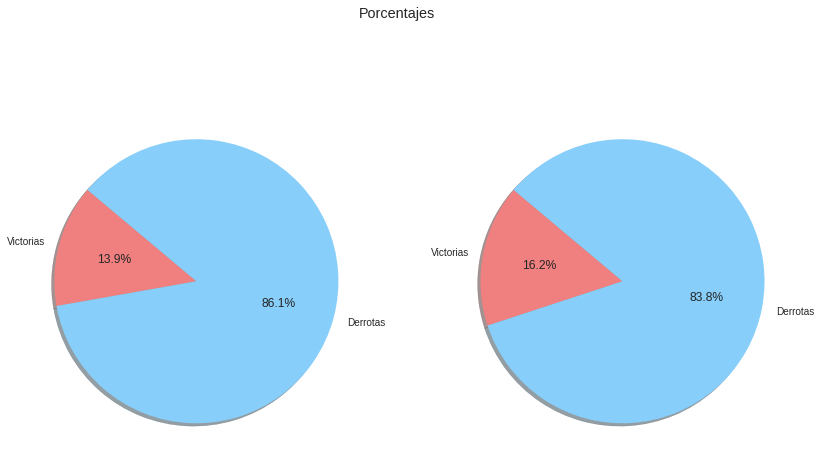

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Porcentajes')

labels = "Victorias", "Derrotas"
porcentajes = [victorias, derrotas]
porcentajes2 = [victorias2, derrotas2]
colors = ['lightcoral', 'lightskyblue']

ax1.pie(porcentajes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

ax2.pie(porcentajes2, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

fig.show()

La de la izquierda es con la baraja de 52 cartas [1-13] y la de la derecha es baraja 48 cartas [1-12]

CODIGO PARA SOLUCIONAR EL PUNTO 2

In [7]:
#se debe remplazar las cartas 11, 12 y 13 por 10 dejanlo la Baraja48 con 12 - 10's y Baraja52 con 16 - 10's
def remplazar10(x):
    
    while(x.count(11)>0):
        x.remove(11)
        x.append(10)
    while(x.count(12)>0):
        x.remove(12)
        x.append(10)
        
    while(x.count(13)>0):
        x.remove(13)
        x.append(10)
        
    return x


In [8]:
#añadir n barajas a la baraja original del mismo tipo
def anadir_Baraja(x,n):
    nueva_baraja = x.copy()
    for i in range(n):
        nueva_baraja.extend(x)
    return nueva_baraja


In [9]:
#Probabilidad de que se haga 21 con la baraja 52
n = 10000
baraja_escogida = baraja(2)
victorias = 0
derrotas = 0

baraja_escogida = remplazar10(baraja_escogida)

baraja_escogida = anadir_Baraja(baraja_escogida,48)
tarjetas_usadas = [0,0,0,0,0,0,0,0,0,0]

for i in range (n):
    #print(i)
    copy_Cartas = baraja_escogida.copy()
    puntaje = 0
    tarjetas_que_hacen21 = list()
    
    while(len(copy_Cartas)>0):
        if(puntaje > 21):
            puntaje = 0
            derrotas += 1
            tarjetas_que_hacen21.clear()
        elif(puntaje == 21):
            puntaje = 0
            victorias += 1
            while(len(tarjetas_que_hacen21) > 0):
                tarjetas_usadas[tarjetas_que_hacen21[0]-1] += 1
                tarjetas_que_hacen21.pop(0)
        else:
            carta = rnd.randint(1,len(copy_Cartas)) - 1
            puntaje += copy_Cartas[carta]
            tarjetas_que_hacen21.append(copy_Cartas[carta])
            #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
            copy_Cartas.pop(carta)

print (victorias, derrotas)
print (tarjetas_usadas)

938724 5783096
[426975, 328210, 310598, 293569, 276444, 261172, 245005, 229864, 216140, 807528]


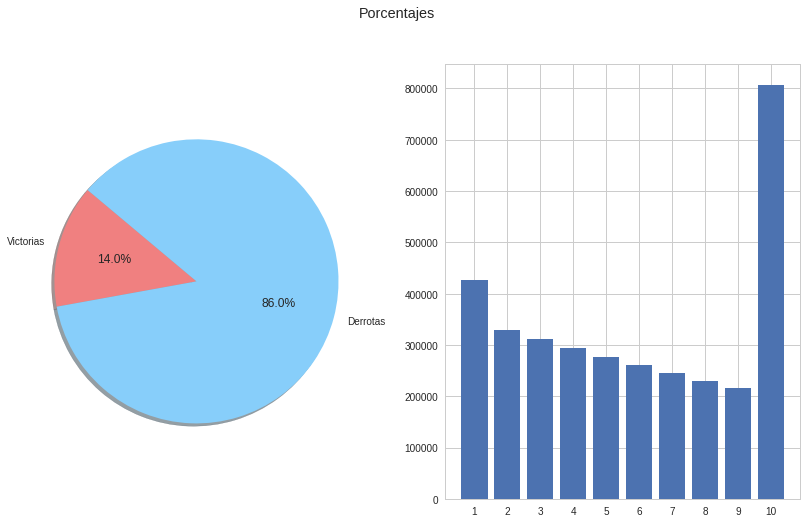

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Porcentajes')

labels = "Victorias", "Derrotas"
porcentajes = [victorias, derrotas]
colors = ['lightcoral', 'lightskyblue']

ax1.pie(porcentajes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

labels = "1","2","3","4","5","6","7","8","9","10",
ax2.bar(labels,tarjetas_usadas)

fig.show()

CODIGO PARA SOLUCIONAR EL PUNTO 3

In [11]:
#se usa una función para modularizar el codigo
def dividir_Baraja(x, y):
    n = int(len(x)/y)
    
    copy_cartas = x.copy()
    nueva_baraja = x.copy()
    nueva_baraja.clear()
    
    for i in range (n):
        carta = rnd.randint(1,len(copy_cartas)) - 1
        nueva_baraja.append(copy_cartas[carta])
        copy_cartas.pop(carta)

    return nueva_baraja

In [12]:
#Probabilidad de que se haga 21 con 19 y solo queda 2/cartas  teniendo ya las cartas [7,7,5]
baraja_escogida = baraja(2)
barajeo = 100

victoria_derrotas = [1,2,3]
victoria_derrotas.clear()

#removemos las cartas dichas para la copia de la baraja
baraja_escogida.remove(7)
baraja_escogida.remove(7)
baraja_escogida.remove(5)

imposibilidad = 0
#QUITAMOS las cartas 
for i in range (barajeo):  
    copy_Cartas = dividir_Baraja(baraja_escogida,2)
    victorias = 0
    derrotas = 0
    if(copy_Cartas.count(1) <= 1 or copy_Cartas.count(2) == 0):
        imposibilidad += 1
    else:
        for j in range (n):
            copy_Cartas2 = copy_Cartas[:]
            #7+7+5 = 19 que es el puntaje que se dice que tiene
            puntaje = 19
            while(puntaje < 21):
                carta = rnd.randint(1,len(copy_Cartas2)) - 1
                puntaje += copy_Cartas2[carta]
                #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
                copy_Cartas2.pop(carta)
            if(puntaje == 21):
                victorias += 1
            else:
                derrotas += 1
    
    victoria_derrotas.append((victorias, derrotas))

In [13]:
while(victoria_derrotas.count((0, 0)) > 0):
    victoria_derrotas.remove((0, 0));

n1 = 0
n2 = 0
for i in range (len(victoria_derrotas)):
    n1 += victoria_derrotas[i][0]
    n2 += victoria_derrotas[i][1]


victoria_derrotas2 = (n1/len(victoria_derrotas)),(n2/len(victoria_derrotas))
print(victoria_derrotas2)

barajeos_porcentaje = (imposibilidad, (barajeo-imposibilidad))
print (barajeos_porcentaje)

(986.9130434782609, 9013.08695652174)
(31, 69)


0.1278


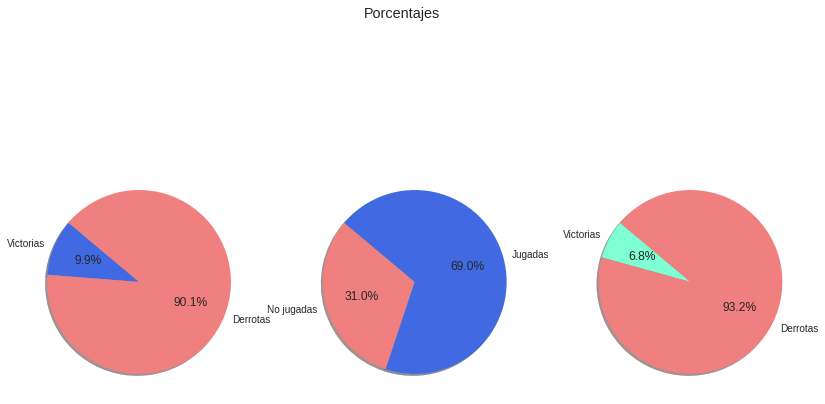

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Porcentajes')

labels = ("Victorias", "Derrotas")
colors = ['royalblue', 'lightcoral']
ax1.pie(victoria_derrotas2, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

labels = ("No jugadas", "Jugadas")
colors = ['lightcoral', 'royalblue']
ax2.pie(barajeos_porcentaje, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

print((victoria_derrotas[0][0])/n)
valores_reales = ((1-(imposibilidad/barajeo))   *  (victoria_derrotas2[0])/n)
valores_reales = (valores_reales, 1- valores_reales)

labels = ("Victorias","Derrotas")
colors = ['aquamarine', 'lightcoral']
ax3.pie(valores_reales, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

fig.show()

CODIGO PARA SOLUCIONAR EL PUNTO 4

con el número de cartas de acuerdo con la lista a continuación (12 cartas tomaremos), con la probabilidad más alta (mazo caliente) y la más baja (mazo frío) de obtener 21 suponiendo que tiene un puntaje [7,7,5] calcular las probabilidades analiticamente.

si tenemos [7,7,5] es un total de 19 puntos es decir solo nos sirven los 1 y los 2 para ganar.

# La baraja más fria 
será aquella con la probabilidad más baja y será aquella donde para cada carta restante se cumple

"Para toda carta de i = 0 hasta n = 12 --> "carta(i) > 2""

y no es posible ganar por que todas las cartas restantes son mayores a 2 es decir 19 + cualquier carta(i) será mayor a 21 es decir 
PROBABILIDAD DE GANAR = 0

# La baraja más caliente 
Será aquella que como el caso contrario tendrá la mayor probabilidad de 1 y 2, pero las probabilidades de ganar son diferentes según el numero que saque por tanto se procede a los dos siguientes casos con la baraja armada de la siguiente forma:

Baraja = [1,1,1,1,2,2,2,2,x,x,x,x]

donde los 1 y 2 representan las cartas del mismo valor y "x" cualquier otra carta (que anteriormente explicado se concluye que se pierde directamente)

ahora sí los dos casos

## Sacar un 2 en la primer ronda
Al sacar un 2 se gana pues (19 + 2 = 21) esto quiere decir que la probabilidad de ganar al primer lanzamiento es 4/12 = 1/3 = 33.3%

## Sacar un 1 en la primer ronda
Al sacar un 1 el puntaje es (19 + 1 = 20) por lo que se puede seguir jugando y ahora con la unica condición para ganar que debe ser un 1 es decir 
primer ronda => 4/12 = 1/3 = 33.3%
segunda ronda => 3/11 = 27,3%

pero esto son probabilidades dependientes, por lo que se cumpla el estado de la segunda ronda debe ocurrir la primera, para cruzar estas probabilidades se multiplican 

4/12 * 3/11 = 9.1%

## Para finalizar
se sabe que sacar 1 o 2 en primer ronda es independiente así que se suman las probabilidades de ganar como si una no influyera en la otra 

33.3% + 9.1% = 42.4%, esa seria la probabilidad de ganar

## ahora lo vamos a comprobar en codigo y simulaciones

In [15]:
#primero creamos las barajas calientes y frias de manera arbitraria siguiendo las normas de la explicación
Caliente = [1,1,1,1,2,2,2,2,3,3,3,3]
Fria = [3,4,5,6,7,8,3,4,5,6,7,8]

print(len(Fria))
print(len(Caliente))

12
12


In [16]:
#Probabilidad de que se haga 21 con la baraja 52
n = 10000
baraja_escogida = Fria.copy()
victorias = 0
derrotas = 0
for i in range (n):
    copy_Cartas = baraja_escogida.copy()
    puntaje = 19
    while(puntaje < 21):
        carta = rnd.randint(1,len(copy_Cartas)) - 1
        puntaje += copy_Cartas[carta]
        #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
        copy_Cartas.pop(carta)
    if(puntaje == 21):
        victorias += 1
    else:
        derrotas += 1

print (victorias, derrotas)

0 10000


In [17]:
#Probabilidad de que se haga 21 con la baraja 52
n = 10000
baraja_escogida = Caliente.copy()
victorias2 = 0
derrotas2 = 0
for i in range (n):
    copy_Cartas = baraja_escogida.copy()
    puntaje = 19
    while(puntaje < 21):
        carta = rnd.randint(1,len(copy_Cartas)) - 1
        puntaje += copy_Cartas[carta]
        #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
        copy_Cartas.pop(carta)
    if(puntaje == 21):
        victorias2 += 1
    else:
        derrotas2 += 1

print (victorias2, derrotas2)

4260 5740


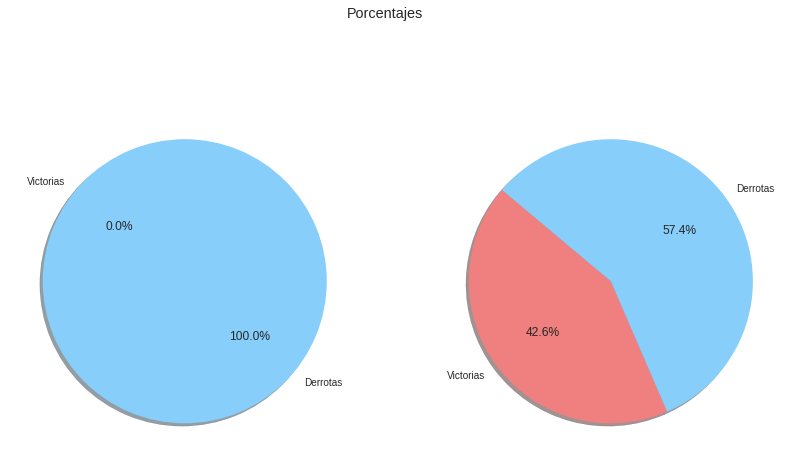

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Porcentajes')

labels = "Victorias", "Derrotas"
porcentajes = [victorias, derrotas]
porcentajes2 = [victorias2, derrotas2]
colors = ['lightcoral', 'lightskyblue']

ax1.pie(porcentajes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

ax2.pie(porcentajes2, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

fig.show()

Puntos solucionados 

1✓
2✓
3✓
4✓
5

CODIGO PARA SOLUCIONAR EL PUNTO 4